In [3]:
int('300')+400

700

In [4]:
id('z')

2818113566128

In [6]:
id("z")

2818113566128

In [7]:
x = 42
x

42

In [8]:
x.imag

0

In [9]:
x.__class__

int

In [10]:
x = ['foo', 'bar']

In [11]:
callable(x.append)

True

In [12]:
callable(x.__doc__)

False

In [13]:
x = ['a', 'b']
x.append('c')
s = 'This is a string'
s.upper()

'THIS IS A STRING'

In [14]:
s.lower()

'this is a string'

In [18]:
s.replace('This', 'That')
# s.replace('THis', 'That')

'That is a string'

In [19]:
x = ['a', 'b']
x[0] = 'aa'
x

['aa', 'b']

In [20]:
x = ['a', 'b']
x.__setitem__(0, 'aa')
x

['aa', 'b']

In [21]:
def f(x): return x**2
f

<function __main__.f(x)>

In [23]:
type(f)

function

In [24]:
id(f)

2818153886344

In [25]:
f.__name__

'f'

In [26]:
f.__call__(6)

36

In [28]:
f.__dir__

<function function.__dir__()>

In [29]:
import math
id(math)

2818118324696

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x = [1, 5, 2]
x.sort()
x

[1, 2, 5]

In [9]:
x.__class__

list

In [10]:
dir(x)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [19]:
def earn(w,y):
    "consumer with initial wealth w earns y"
    return w+y

def spend(w,x):
    "consumer with initial wealth w spend x"
    new_wealth = w - x
    if new_wealth < 0:
        print('Insufficient funds')
    else:
        return new_wealth

In [20]:
w0=100
w1=earn(w0,10)
w2=spend(w1,20)
w3=earn(w2,10)
w4=spend(w3,20)
print('w0,w1,w2,w3,w4 =',w0,w1,w2,w3,w4)

w0,w1,w2,w3,w4 = 100 110 90 100 80


In [21]:
class Consumer:
    def __init__(self, w):
        "Initialize consumer with w dollars of wealth"
        self.wealth = w
        
    def earn(self, y):
        "The consumer earns y dollars"
        self.wealth += y
        
    def spend(self, x):
        "The consumer spends x dollars if feasible"
        new_wealth = self.wealth - x
        if new_wealth < 0:
            print('Insufficient funds')
        else:
            self.wealth = new_wealth

In [22]:
c1 = Consumer(10)
c1.spend(5)
c1.wealth

5

In [28]:
c1.earn(15)
c1.spend(100)

Insufficient funds


In [30]:
c1, c2 = Consumer(10), Consumer(12)
c2.spend(4)
c2.wealth

8

In [31]:
c1.wealth

10

In [32]:
c1.__init__

<bound method Consumer.__init__ of <__main__.Consumer object at 0x000001FAF9BE9888>>

In [33]:
c2.__dict__

{'wealth': 8}

In [34]:
Consumer.__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.Consumer.__init__(self, w)>,
              'earn': <function __main__.Consumer.earn(self, y)>,
              'spend': <function __main__.Consumer.spend(self, x)>,
              '__dict__': <attribute '__dict__' of 'Consumer' objects>,
              '__weakref__': <attribute '__weakref__' of 'Consumer' objects>,
              '__doc__': None})

In [35]:
print(Consumer.__dict__)

{'__module__': '__main__', '__init__': <function Consumer.__init__ at 0x000001FAF9C3AB88>, 'earn': <function Consumer.earn at 0x000001FAF9C3AAF8>, 'spend': <function Consumer.spend at 0x000001FAF9C3AA68>, '__dict__': <attribute '__dict__' of 'Consumer' objects>, '__weakref__': <attribute '__weakref__' of 'Consumer' objects>, '__doc__': None}


In [37]:
c1 = Consumer(10)
c1.earn(10)
c1.wealth

20

In [46]:
class Solow:
    """
    solow model
    """
    def __init__(self, n=0.05,
                       s=0.25,
                       δ=0.1,
                       α=0.3,
                       z=2,
                       k=1):
        self.n, self.s, self.δ, self.α, self.z = n,s,δ,α,z
        self.k=k
        
    def h(self):
        "evaluate the h function"
        n,s,δ,α,z = self.n, self.s, self.δ, self.α, self.z
        return(s*z*self.k**α + (1-δ)*self.k)/(1+n)
    def update(self):
        "Update the current state (i.e., the capital stock)."
        self.k = self.h()
        
    def steady_state(self):
        'compute the steady state value of capital'
        n,s,δ,α,z = self.n, self.s, self.δ, self.α, self.z
        return ((s*z)/(n+δ))**(1/(1-α)) 
    
    def generate_sequence(self, t):
        'Generate and return a time series of length t'
        path = []
        for i in range(t):
            path.append(self.k)
            self.update()
        return path   

<function matplotlib.pyplot.show(*args, **kw)>

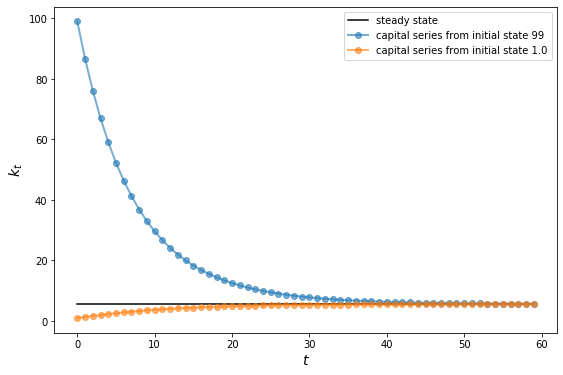

In [51]:
s1 = Solow(k=99)
s2 = Solow(k=1.0)

T = 60
fig, ax = plt.subplots(figsize=(9,6))

ax.plot([s1.steady_state()]*T,'k-',label='steady state')

for s in s1, s2:
    lb = f'capital series from initial state {s.k}'
    ax.plot(s.generate_sequence(T),'o-',lw=2,alpha=0.6,label=lb)
    
ax.set_xlabel('$t$', fontsize = 14)
ax.set_ylabel('$k_t$',fontsize = 14)
ax.legend()
plt.show


In [50]:
from scipy.integrate import quad

class Market:
    
    def __init__(self, ad, bd, az, bz, tax):
        """
        Set up market parameters.  All parameters are scalars.
        """
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Insufficient demand')
            
    def price(self):
        "Compute equilibrium price"
        return (self.ad-self.az+self.bz*self.tax)/(self.bd+self.bz)
    
    def quantity(self):
        "compute equilibrium quantity"
        return self.ad - self.bd*self.price()
    
    def consumer_surp(self):
        "compute consumer surplus"
        integrand = lambda x: (self.ad/self.bd) - (1/self.bd)*x
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price()*self.quantity()
    
    def producer_surp(self):
        "Compute producer surplus"
        integrand = lambda x: -(self.az/self.bz) + (1/self.bz)*x
        area, error = quad(integrand, 0, self.quantity())
        return (self.price()-self.tax)*self.quantity()-area
    
    def taxrev(self):
        "Compute tax revenue"
        return self.tax * self.quantity()

    def inverse_demand(self, x):
        "Compute inverse demand"
        return self.ad / self.bd - (1 / self.bd)* x

    def inverse_supply(self, x):
        "Compute inverse supply curve"
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax

    def inverse_supply_no_tax(self, x):
        "Compute inverse supply curve without tax"
        return -(self.az / self.bz) + (1 / self.bz) * x

In [51]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
print("equilibrium price =", m.price())

equilibrium price = 18.5


In [52]:
print("consumer surplus =", m.consumer_surp())

consumer surplus = 33.0625


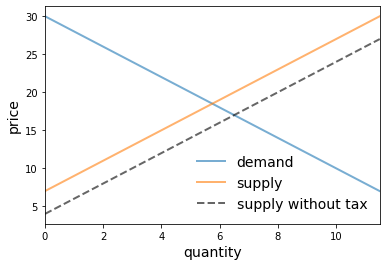

In [53]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)

q_max = m.quantity()*2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.inverse_demand(q_grid)
ps = m.inverse_supply(q_grid)
psno = m.inverse_supply_no_tax(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')
ax.plot(q_grid, psno, '--k', lw=2, alpha=0.6, label='supply without tax')
ax.set_xlabel('quantity',fontsize=14)
ax.set_xlim(0, q_max)
ax.set_ylabel('price', fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=14)
plt.show()

In [54]:
def deadw(m):
    "computes deadweight loss for market m."
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0)
    surp1 = m_no_tax.consumer_surp()+m_no_tax.producer_surp()
    surp2 = m.consumer_surp()+m.producer_surp()+m.taxrev()
    return surp1-surp2

In [55]:
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
deadw(m)

1.125

In [60]:
class Chaos:
    """
    models a dynamic system
    """
    def __init__(self, x0, r):
        self.x, self.r = x0, r
        
    def update(self):
        self.x = self.r*self.x*(1-self.x)
        
    def generate_sequence(self, n):
        path = []
        for i in range(n):
            path.append(self.x)
            self.update()
        return path

In [61]:
ch = Chaos(0.1,4.0)
ch.generate_sequence(5)

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498]

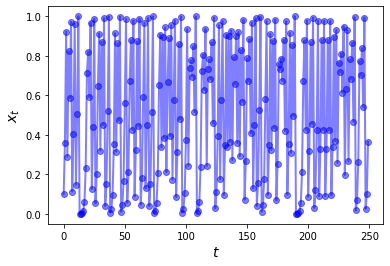

In [62]:
ch = Chaos(0.1,4.0)
ts_length = 250

fig, ax = plt.subplots()
ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$x_t$',fontsize=14)
x = ch.generate_sequence(ts_length)
ax.plot(range(ts_length),x,'bo-',alpha=0.5,lw=2,label='$x_t$')
plt.show()

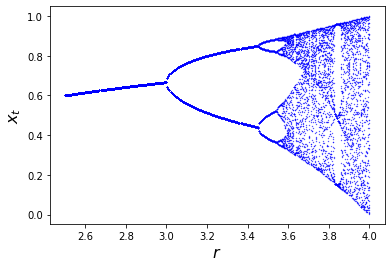

In [63]:
fig, ax = plt.subplots()
ch = Chaos(0.1, 4)
r = 2.5
while r < 4:
    ch.r = r
    t = ch.generate_sequence(1000)[950:]
    ax.plot([r]*len(t), t, 'b.', ms=0.6)
    r = r + 0.005
    
ax.set_xlabel('$r$',fontsize=16)
ax.set_ylabel('$x_t$',fontsize=16)
plt.show()

In [65]:
x=(10,20)
len(x)

2

In [85]:
class Foo:
    def __len__(self):
        return 42

In [90]:
f = Foo()
# len(f)
f.__len__()

42

In [91]:
class Foo:
    def __call__(self, x):
        return x + 42

In [92]:
f = Foo()
f(8)
f.__call__(8)

50

In [170]:
from random import uniform

class ECDF:
    
    def __init__(self, x, count):
        
        self.x, self.count = x, count
        
    def __call__(self, samples):
        
        self.count = 0
        for i in range(len(samples)):
            if samples[i] < self.x:
                self.count += 1
            else:
                self.count = self.count
            
        return (1/len(samples))*self.count


In [172]:
F_n = ECDF(0.5, 0)

In [175]:
F_n.__call__([uniform(0, 1) for i in range(10000)])

0.5037

In [182]:
from random import uniform

class ECDF:
    
    def __init__(self, samples):
        
        self.samples = samples
        
    def __call__(self, x, count):
        
        count = 0
        for i in range(len(self.samples)):
            if self.samples[i] < x:
                count += 1
            else:
                count = count
            
        return (1/len(self.samples))*count

In [183]:
F_n = ECDF([uniform(0, 1) for i in range(10000)])
F_n(0.5, 0)

0.5023

In [186]:
from random import uniform

class ECDF:
    
    def __init__(self, samples):
        
        self.samples = samples
        
    def __call__(self, x):
        
        count = 0
        for i in range(len(self.samples)):
            if self.samples[i] < x:
                count += 1
            else:
                count = count
            
        return (1/len(self.samples))*count


In [255]:
F_n = ECDF([uniform(0, 1) for i in range(10000)])
F_n(0.8)

0.7996000000000001

In [250]:
class Polynomial:
    """
    """
    def __init__(self, coef):
        ""
        self.coef = coef
    
    def calculate(self, x):
        ""
        cal = 0
        i = 0
        for i in range(len(self.coef)):
            cal += self.coef[i]*x**i
            i += 1
        return cal
    
    def diff(self, x):
        ""
#         new_coefficients = []
#         for i, a in enumerate(self.coefficients):
#             new_coefficients.append(i * a)
#         del new_coefficients[0]
        d = 0
        for i in range(1, len(self.coef)):
            d += i*self.coef[i]*x**(i-1)
            i += 1
        return d

In [251]:
F = Polynomial([5, 4, 3, 2, -1])

In [252]:
F.calculate(666)

-196149775207

In [254]:
F.diff(666)

-1178967848